# Group Assignment 1: Human Activity Detection
In this assignment you will create you own dataset for classification. You will explore which ML algorithms are best to classify this and you will present your best solution. 

- Create your own dataset for custom human motions using Phyphox
- There should be at least 3 distinct types of motions
- The motions should be different to the ones used in the UCI dataset (Not: walking, sitting, standing, laying, stairs)
- Follow the steps and answer the questions given in this notebook

### Generating your dataset:

For this assignment you will create your own dataset of motions that you collect with an Accelerometer and Gyroscope. For this you can use your phone as a sensor.
To be able to collect your data you can best use an app called [phyphox](https://phyphox.org/), this is a free app available in app stores. This app can be configured to acces your sensordata, sample it as given frequency's. you can set it up te have experiment timeslots, and the data with a timestamp can be exported to a needed output format.

![](https://phyphox.org/wp-content/uploads/2019/06/phyphox_dark-1024x274.png)

When you installed the app you can setup a custum experiment by clicking on the + button. Define an experiment name, sample frequency and activate the Accelerometer and Gyroscope. Your custom experiment will be added, you can run it pressing the play button and you will see sensor motion. Pressing the tree dots (...) lets you define timed runs, remote access and exporting data.

Phyphox will generate 2 files with sensor data, one for the Accelerometer and one for the Giro. Both files will have timestamps which might not match the recorded sensor data for each sensor. Please, preprocess and merge the files for using it as your dataset for training, testing and deploying your own supervised learning model.

### steps

With your own generated dataset the similar sequence of steps should be taken to train your model.

These are the generic steps to be taken
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.
9. Additional Questions


---
In the Notebook this structure is used for dividing the different steps, so make sure you do the implementation and analisis at these location in the notebook. 

You may add additinal code blocks, but keep the seperation of the given structure.

At the end of each block summarize / comment / conclude your current step in the given textblocks.




```
Project group 20:
Lars Claassen   - 4159632
Tonnie Bour     - 4130456
Pjotr Maes      - 3839001
```


# 1. Frame the problem and look at the big picture
Describe the problem at hand and explain your approach

```
A model is designed to classify human activities. To achieve this, data is gathered to train multiple models for classification.

We use our phones and their built-in sensors to track the following activities:
    - Casual walking
    - Walking while looking at the phone
    - Drinking
For each activity, gyroscope, acceleration, and linear acceleration data are recorded and logged. Each activity is measured separately in 10-second intervals. The recorded data is then compressed into various features, including minimum, maximum, mean, and standard deviation values, resulting in 38 features per measurement.

The compressed values from each measurement are compiled into a single dataset, which is then split into training and testing sets. Different model types are trained and evaluated to determine the most suitable one, providing insight into which model performs best with our data.

```


# 2. Get the data.

Initialize the system, get all needed libraries, retreive the data and import it

> Create your own dataset

> Explain and show (with a few images) which motions you are classifing, how you generated them, what the problems where you encountered in this process! 


```
To gather the data we used an app called Phyphox. Within this app we created our own exercise that tracks the gyroscope, acceleration, and linear acceleration. This data is logged and saved per activity. Each activity/measurement records for about 10 seconds, this is for each exercise the same to prevend a bias from forming towards the "longer during" activity.

For casual walking we held the phone in the palm of our hand while swinging it as you would naturally do while walking. 
```

<img src="Images/W1.jpg" alt="Person holding phone" width="300">
<img src="Images/W2.jpg" alt="Person holding phone" width="300">
<img src="Images/W3.jpg" alt="Person holding phone" width="300">

```
To measure walking while looking at the phone a subject would walk with the phone as if he/she would be texting or looking at their phone. 
```

<img src="Images/WW1.jpg" alt="Person holding phone" width="300">
<img src="Images/WW2.jpg" alt="Person holding phone" width="300">
<img src="Images/WW3.jpg" alt="Person holding phone" width="300">

```
To measure drinking a subject would hold the phone in the hand together with their beverage (of their choice) and take multiple sips. 
```

<img src="Images/D1.jpg" alt="Person holding phone" width="300">
<img src="Images/D2.jpg" alt="Person holding phone" width="300">
<img src="Images/D3.jpg" alt="Person holding phone" width="300">

```
To achieve the best model performance, a large amount of data is required. However, creating a prototype model using a smaller dataset is still feasible.

In our case, three subjects perform each activity 10 times, resulting in 30 datasets per activity across three subjects. This brings the total dataset size to 90 measurements.

```

````
Two significant problems were encountered during data collection:
1) Finding motions that are distinct from each other and keep them consisten over multiple people deemed difficult.
2) Aligning different naming conventions, as various phone brands produced results with differing labels.



# 3. Explore the data to gain insights.

Explore the data in any possible way, visualize the results (if you have multiple plots of the same kind of data put them in one larger plot)

```
Each measurement is put seperately in a folder that specifies who has done the measurement, the action and the occurence of the action. The three csv files have raw data of the sensors, along with a timestamp.

In "1-drinking1 2024-12-12 14-47-32" the first 1 states the person who has done the measurement. Afterwards the action is stated along with the measurement index. Everything after that is stating the time, but this information is ignored, since this has no significant importance to the model or testing.

A plotted version of the data is visible below.

```

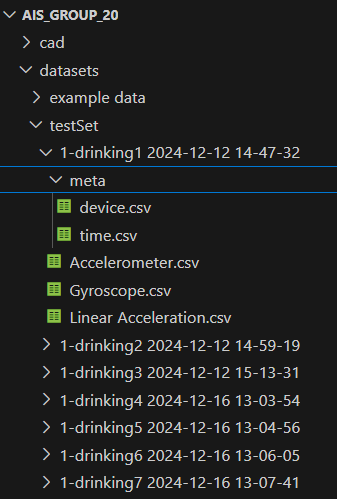

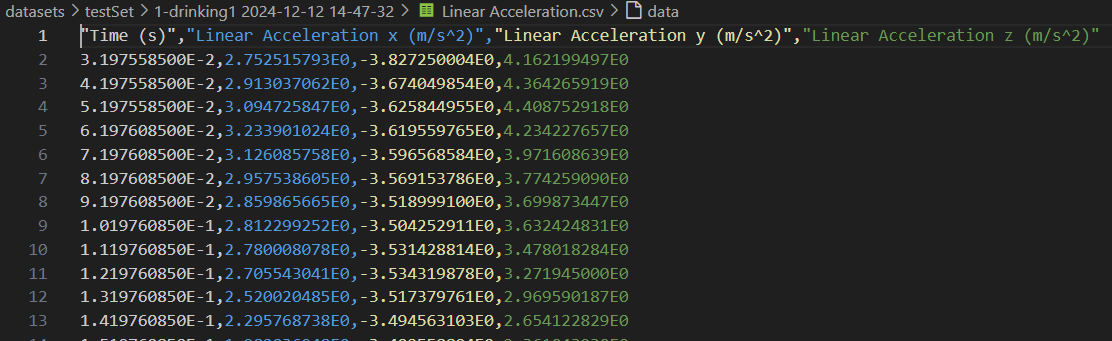

In [2]:
import pandas as pd

# File paths
accelerometer_path = 'datasets/testSet/1-drinking1 2024-12-12 14-47-32/Accelerometer.csv'
gyroscope_path = 'datasets/testSet/1-drinking1 2024-12-12 14-47-32/Gyroscope.csv'
linear_acceleration_path = 'datasets/testSet/1-drinking1 2024-12-12 14-47-32/Linear Acceleration.csv'

# Load data from CSV files
accelerometer_df = pd.read_csv(accelerometer_path)
gyroscope_df = pd.read_csv(gyroscope_path)
linear_acceleration_df = pd.read_csv(linear_acceleration_path)

# Display the first few rows of each DataFrame to inspect their structure
accelerometer_df.head(), gyroscope_df.head(), linear_acceleration_df.head()


(   Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
 0  0.011976                1.367089                3.924097   
 1  0.021976                1.450886                3.849876   
 2  0.031976                1.608904                3.957615   
 3  0.041976                1.800440                4.072537   
 4  0.051976                2.013524                4.082114   
 
    Acceleration z (m/s^2)  
 0                9.411906  
 1                9.682451  
 2               10.015245  
 3               10.273819  
 4               10.374375  ,
    Time (s)  Gyroscope x (rad/s)  Gyroscope y (rad/s)  Gyroscope z (rad/s)
 0  0.011976            -0.638201            -0.616058            -0.067042
 1  0.027086            -0.638201            -0.616058            -0.067042
 2  0.037086            -0.638201            -0.616058            -0.067042
 3  0.047086            -0.638201            -0.616058            -0.067042
 4  0.057086            -1.264338             0.798095     

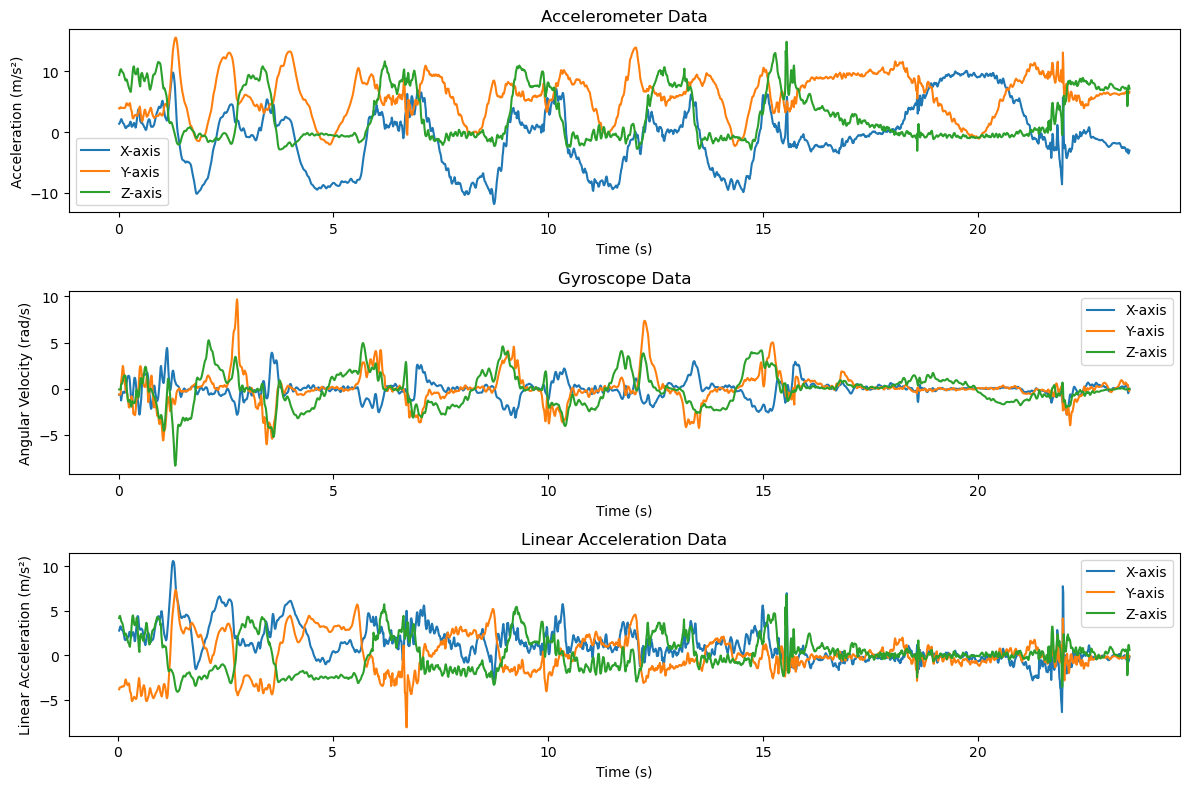

In [3]:
import matplotlib.pyplot as plt

# Plot Accelerometer Data
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(accelerometer_df['Time (s)'], accelerometer_df['Acceleration x (m/s^2)'], label='X-axis')
plt.plot(accelerometer_df['Time (s)'], accelerometer_df['Acceleration y (m/s^2)'], label='Y-axis')
plt.plot(accelerometer_df['Time (s)'], accelerometer_df['Acceleration z (m/s^2)'], label='Z-axis')
plt.title('Accelerometer Data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()

# Plot Gyroscope Data
plt.subplot(3, 1, 2)
plt.plot(gyroscope_df['Time (s)'], gyroscope_df['Gyroscope x (rad/s)'], label='X-axis')
plt.plot(gyroscope_df['Time (s)'], gyroscope_df['Gyroscope y (rad/s)'], label='Y-axis')
plt.plot(gyroscope_df['Time (s)'], gyroscope_df['Gyroscope z (rad/s)'], label='Z-axis')
plt.title('Gyroscope Data')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()

# Plot Linear Acceleration Data
plt.subplot(3, 1, 3)
plt.plot(linear_acceleration_df['Time (s)'], linear_acceleration_df['Linear Acceleration x (m/s^2)'], label='X-axis')
plt.plot(linear_acceleration_df['Time (s)'], linear_acceleration_df['Linear Acceleration y (m/s^2)'], label='Y-axis')
plt.plot(linear_acceleration_df['Time (s)'], linear_acceleration_df['Linear Acceleration z (m/s^2)'], label='Z-axis')
plt.title('Linear Acceleration Data')
plt.xlabel('Time (s)')
plt.ylabel('Linear Acceleration (m/s²)')
plt.legend()

plt.tight_layout()
plt.show()


```
Of course, this data does not have any context and is not ready to be used as input for a learning model. Given that the information comes from multiple instances of the same action in a measurement, transforming this data into a mean, standard deviation, minimum value, and maximum value will generalize each action. This will improve the comprehensiveness of the data.
```

# 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

prepare your data, is it normalized? are there outlier? Make a training and a test set.

```
At first all of the data must be collected into one file. This makes reading the data for the model a novel task. While this task is done the before mentioned mean, std, min and max are also calculated for each seperete stream of data. This results in a data size of (90, 38).
```

In [17]:
# YOUR CODE HERE 
import os
import pandas as pd

# Define the path to the root folder containing the action folders
root_folder = "datasets/testSet"

# Create an empty list to hold the summarized data
summary_data = []

# Iterate through all folders in the root folder
for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)

    # Check if the folder_path is a directory
    if os.path.isdir(folder_path):
        # Extract person and action from the folder name
        parts = folder_name.split("-")
        if len(parts) >= 2:
            person = parts[0]
            action_with_index = parts[1].rsplit(" ", 1)[0]
            action = ''.join([i for i in action_with_index if not i.isdigit()])

            summary_row = {
                'subject': person,
                'Activity': action,
                
            }

            # Iterate through all CSV files in the folder
            for file_name in os.listdir(folder_path):
                if file_name.endswith(".csv"):
                    file_path = os.path.join(folder_path, file_name)
                    try:
                        # Read the CSV file
                        data = pd.read_csv(file_path)

                        # Skip empty files
                        if data.empty:
                            print(f"Skipping empty file: {file_path}")
                            continue
                        
                        # Transfer names to insure device campatibility (Apple using different naming convension)
                        if {"X (m/s^2)", "Y (m/s^2)", "Z (m/s^2)"}.issubset(data.columns) and file_name == "Accelerometer.csv":
                            data.rename(columns={
                                "X (m/s^2)": "Acceleration x (m/s^2)",
                                "Y (m/s^2)": "Acceleration y (m/s^2)",
                                "Z (m/s^2)": "Acceleration z (m/s^2)"
                            }, inplace=True)
                        elif {"X (rad/s)", "Y (rad/s)", "Z (rad/s)"}.issubset(data.columns):
                            data.rename(columns={
                                "X (rad/s)": 'Gyroscope x (rad/s)',
                                "Y (rad/s)": 'Gyroscope y (rad/s)',
                                "Z (rad/s)": 'Gyroscope z (rad/s)'
                            }, inplace=True)
                        elif {"X (m/s^2)","Y (m/s^2)","Z (m/s^2)"}.issubset(data.columns):
                            data.rename(columns={
                                "X (m/s^2)": 'Linear Acceleration x (m/s^2)',
                                "Y (m/s^2)": 'Linear Acceleration y (m/s^2)',
                                "Z (m/s^2)": 'Linear Acceleration z (m/s^2)'
                            }, inplace=True)



                        # Determine which type of data (Accelerometer, Gyroscope, or Linear Acceleration)
                        if {'Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)'}.issubset(data.columns):
                            data_type = "Accelerometer"
                            columns = ['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']

                        elif {'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)'}.issubset(data.columns):
                            data_type = "Gyroscope"
                            columns = ['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']

                        elif {'Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)'}.issubset(data.columns):
                            data_type = "Linear Acceleration"
                            columns = ['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)']

                        else:
                            print(f"File {file_path} does not contain recognized column names. Skipping.")
                            continue

                        # Calculate statistics for relevant columns
                        mean_values = data[columns].mean()
                        std_values = data[columns].std()
                        min_values = data[columns].min()
                        max_values = data[columns].max()

                        # add to the summary row
                        for col in columns:
                            summary_row[f'{col}_mean'] = mean_values[col]
                            summary_row[f'{col}_std'] = std_values[col]
                            summary_row[f'{col}_min'] = min_values[col]
                            summary_row[f'{col}_max'] = max_values[col]
                        
                    except Exception as e:
                        print(f"Error reading file {file_path}: {e}")
            summary_data.append(summary_row)
# Create a dataframe from the summary data
if not summary_data:
    print("No valid data found. Summary CSV will not be created.")
else:
    summary_df = pd.DataFrame(summary_data)

    # Save the summarized data to a single CSV file
    output_path = os.path.join(root_folder, "data_total.csv")
    summary_df.to_csv(output_path, index=False)

    print(f"Summary data saved to {output_path}")

print(summary_df.shape)
    

Summary data saved to datasets/testSet\data_total.csv
(90, 38)


```
Due to the small sample size the test/train split is set on 80% training data.
```

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'datasets/testSet/data_total.csv'
data = pd.read_csv(file_path)

# Set your split ratio (e.g., 0.8 for 80% training, 20% testing)
split_ratio = 0.8  # Change this value as desired (0 < split_ratio < 1)

# Split the dataset into train and test sets
train_set, test_set = train_test_split(data, test_size=(1 - split_ratio), random_state=42)

# Save the splits to new CSV files (optional)
train_set.to_csv('datasets/train_set.csv', index=False)
test_set.to_csv('datasets/test_set.csv', index=False)

# Print the sizes of the splits
print(f"Train set size: {train_set.shape}")
print(f"Test set size: {test_set.shape}")


Train set size: (72, 38)
Test set size: (18, 38)


```
Now the data is ready to be checked for outliers, missing data, and other anomalies.
```

In [19]:
# import libraries
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from mpl_toolkits import mplot3d
from pylab import rcParams

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam


import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.facecolor':'#ffffff'})

In [ ]:
# load data
df_train = pd.read_csv('datasets/train_set.csv')
df_test = pd.read_csv('datasets/test_set.csv')

In [ ]:
# shape data
print(f"Train Dataset Shape: {df_train.shape}")
print(f"Test Dataset Shape: {df_test.shape}")

Train Dataset Shape: (72, 38)
Test Dataset Shape: (18, 38)


In [ ]:
# missing data counts
print(f"Train Dataset Missing Data Counts: {df_train.isna().sum().sum()}")
print(f"Test Dataset Missing Data Counts: {df_test.isna().sum().sum()}")

Train Dataset Missing Data Counts: 0
Test Dataset Missing Data Counts: 0


In [ ]:
# duplicates data counts
print(f"Train Dataset Duplicate Data Counts: {df_train.duplicated().sum()}")
print(f"Test Dataset Duplicate Data Counts: {df_test.duplicated().sum()}")

Train Dataset Duplicate Data Counts: 0
Test Dataset Duplicate Data Counts: 0


```
As can be seen above, no duplicates or missing data is found inside of both the train and test sets.
```

```
Now below the spread of the actions between the test and train set is plotted. This makes it possible to check if the training or testing will have blindspots for present data.
```

findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.


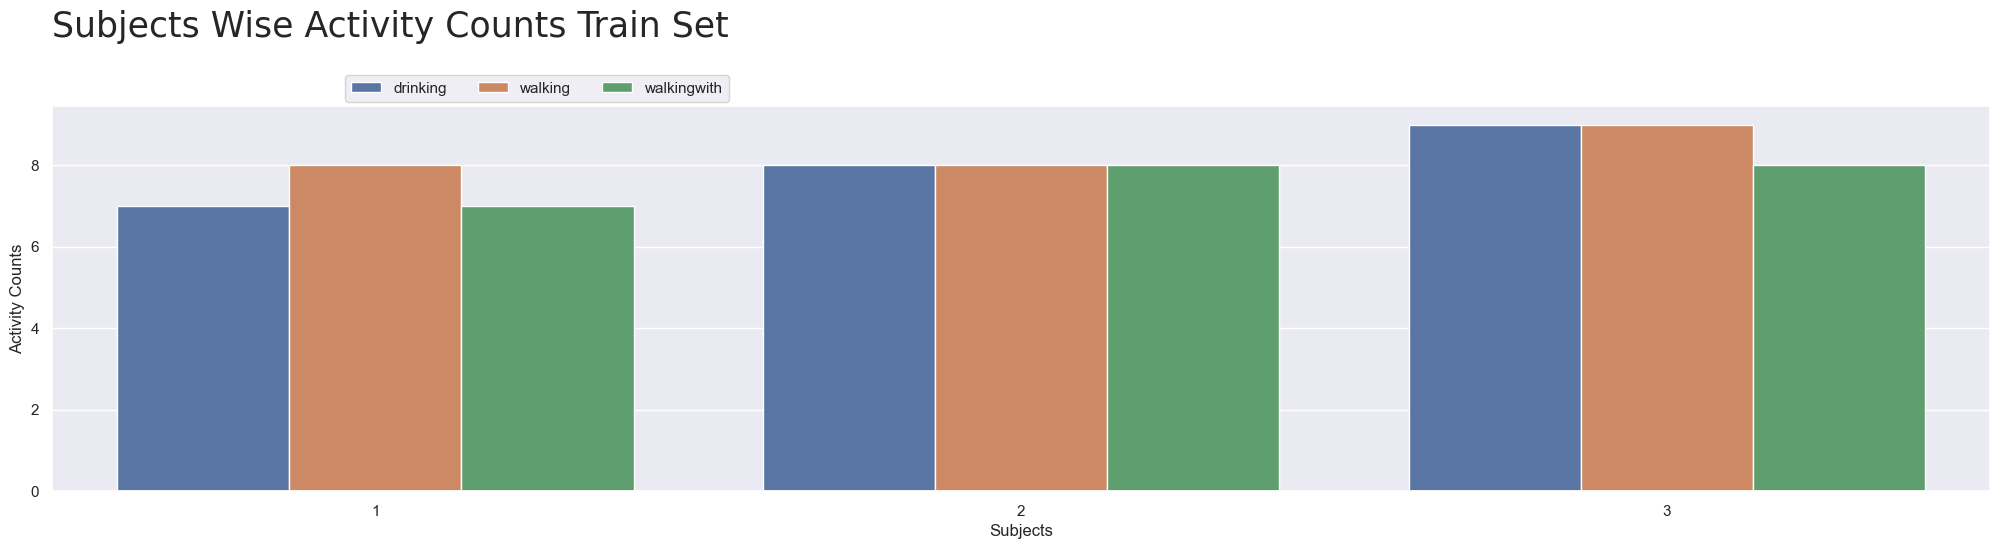

<Figure size 500x500 with 0 Axes>

In [ ]:
# check data balanced or not for train
plt.figure(figsize=(25, 5))
count_plot=sns.countplot(data=df_train, x='subject', hue='Activity')
plt.gca().tick_params(axis='x')
plt.gca().tick_params(axis='y')
plt.xlabel( xlabel='Subjects')
plt.ylabel( ylabel='Activity Counts')
plt.legend(["drinking", "walking", "walkingwith"],bbox_to_anchor = (0.25, 1.1), ncol=6, loc='upper center')
plt.title("Subjects Wise Activity Counts Train Set", fontsize=25, loc='left', pad=50, fontfamily="roboto")
plt.show()


plt.figure(figsize=(5, 5))
label_counts = df_train['Activity'].value_counts()
colors = px.colors.qualitative.Plotly

graph = go.Bar(x=label_counts.index, y=label_counts.values, marker = dict(color = colors))
layout = go.Layout(
    height=450, width=1100,
    title = 'Acticity Counts Distribution Train Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))

iplot(fig)

In [ ]:
# Acticity Counts Distribution For Train & Test Set using pie chart
label_counts_for_train = df_train['Activity'].value_counts()
colors = px.colors.qualitative.Plotly

label_counts_for_test = df_test['Activity'].value_counts()


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(hole=0.5, labels=label_counts_for_train.index, values=label_counts_for_train.values, name="Train Set"), 1, 1)
fig.add_trace(go.Pie(hole=0.5, labels=label_counts_for_test.index, values=label_counts_for_test.values, name="Test Set"), 1, 2)

fig.update_layout(
#     height=450, width=1100,
    title = 'Acticity Counts Distribution For Train & Test Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
#     margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
# graph = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))
fig.show()

```
The proportion between outliers and the range is also important to understand. This can be achieved with the following piece of code.
```

In [ ]:
# fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig = go.Figure()
fig.add_trace(go.Box(y=df_train['subject'], name="Train Set", notched=True))
fig.add_trace(go.Box( y=df_test['subject'], name="Test Set", notched=True))


fig.update_xaxes(showgrid=False)
fig.update_layout(
    title="Check Outliers In Train & Test",
    height=500, width=500,
    title_font=dict(size=25, color='#a5a7ab', family='Muli'),
    font=dict(color='#8a8d93'),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    margin=dict(t=100, b=10, l=70, r=40), 
    )
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)


```
The Train and Test Sets have a similar median, but the Train Set is slightly less spread out and has fewer extreme values. The Test Set shows longer whiskers, suggesting it may have a few larger or more outliers.
```

In [ ]:
# Accelerometer & Gyroscope Columns Counts
lin = 0
acc = 0
gyro = 0
other = 0

for value in df_train.columns:
    if "Linear" in str(value):
        lin += 1
    elif "Acc" in str(value):
        acc += 1
    elif "Gyro" in str(value):
        gyro += 1
    else:
        other += 1

graph = go.Bar(x=['Accelerometer', 'Gyroscope', "Linear", 'Others'], y=[acc,gyro,lin,other], marker = dict(color = colors))
layout = go.Layout(
    height=450, width=500,
    title = 'Accelerometer & Gyroscope Columns Counts',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))

iplot(fig)

```
Below are the correlation matrices for the three different activities. The information below indicates that no significant results come from the correlation graphs.
```

In [ ]:
corl = df_train.drop(['subject'], axis=1)
encoded_columns = pd.get_dummies(corl['Activity'])
corl = pd.concat([encoded_columns, corl.drop(columns=['Activity'])], axis=1)
#print(corl)
corr_matrix = corl.corr()
corr_matrix["walking"].sort_values(ascending=False)

walking                               1.000000
Linear Acceleration y (m/s^2)_std     0.854779
Linear Acceleration x (m/s^2)_std     0.838585
Linear Acceleration x (m/s^2)_max     0.801277
Gyroscope x (rad/s)_std               0.748054
Gyroscope y (rad/s)_std               0.743683
Gyroscope z (rad/s)_std               0.715002
Acceleration x (m/s^2)_max            0.677213
Gyroscope x (rad/s)_max               0.586792
Acceleration x (m/s^2)_mean           0.576655
Gyroscope z (rad/s)_max               0.493195
Gyroscope y (rad/s)_max               0.484486
Linear Acceleration z (m/s^2)_max     0.373078
Linear Acceleration x (m/s^2)_mean    0.324364
Linear Acceleration z (m/s^2)_mean    0.318132
Acceleration y (m/s^2)_std            0.308860
Linear Acceleration y (m/s^2)_max     0.283337
Acceleration x (m/s^2)_std            0.227211
Acceleration x (m/s^2)_min            0.155995
Linear Acceleration z (m/s^2)_std     0.151835
Acceleration z (m/s^2)_std            0.000855
Acceleration 

# 5. Explore many different models and short-list the best ones.

Explore / train and list the top 3 algorithms that score best on this dataset.

In [ ]:
# YOUR CODE HERE 

```
# Place your comments / conclusions / insight here
```


# 6. Fine-tune your models and combine them into a great solution.

can you get better performance within a model? e.g if you use a KNN classifier how does it behave if you change K (k=3 vs k=5 vs k=?). Which parameters are here to tune in the chosen models? 

In [ ]:
# YOUR CODE HERE 

```
# Place your comments / conclusions / insight here
```


# 7. Present your solution.

Explain why you would choose for a specific model

In [ ]:
# YOUR CODE HERE 

```
# Place your comments / conclusions / insight here
```


# 8. Launch, monitor, and maintain your system.

Can you Deployment the model?

> NOTE: The app provides the option for remote access, so you are able to get live sensordata from the phone

# 9. Additional Questions

* Explain the chosen motions you chose to be classified. 

* Which of these motions is easier/harder to classify and why?

* After your experience, which extra sensor data might help getting a better classifier and why?

* Explain why you think that your chosen algorithm outperforms the rest? 

* While recording the same motions with the same sensor data, what do you think will help improving the performance of your models?


```
# Place your comments / conclusions / insight here
```
